# Influence propagation. Threshold Models

During this lab we will consider simulation of influence propagation through network and see what can thread its spread.

In [1]:
import numpy as np
import scipy as sp
import networkx as nx
import functools as ft
import matplotlib.pyplot as plt
%matplotlib inline

## Linear Threshold Model 

To recall the setting:
* Influence spread iteratively given some initially activated nodes (adopters)
* Each node $v_i$ have an activation threshold $\theta_i \in [0, 1]$
* If fraction of "activated" neighbours is greater than $\theta_i$, node $v_i$ also become activated

This information (or behaviour) spreading process is also called cascade. If after some number of iterations the whole network became activated we have a **complete cascade**.

In [9]:
# Some initials
G = nx.erdos_renyi_graph(10, 0.4)
pos = nx.spring_layout(G)
A = np.array(nx.adjacency_matrix(G).todense())
n = A.shape[0]

theta = 2.0/5

idx = [0,1,2]
initActive = np.zeros((n,), dtype=bool)
initActive[idx] = 1

In [10]:
# Influence propagation simulation
def InfluenceProp(A, intiActive, theta, itersNum = np.inf):
    deg = np.sum(A,axis=0, dtype=float)
    i = 1 # iteration
    resActive = initActive.copy()    
    while i < itersNum:
        i+=1
        # currently inactive nodes
        inactiveId = np.where(resActive == 0)[0]    
        # activated nodes
        idx = np.sum(A[np.ix_(resActive==1, resActive==0)], axis=0) / deg[resActive==0] > theta
        if np.any(idx):
            resActive[inactiveId[idx]] = 1
        else:
            break

    return resActive

# Demonstration
def ShowIteration(G, initActive, resultActive, pos):
    fig = plt.figure(figsize=(15,10))
    plt.subplot(1,2,1)
    nx.draw(G, pos=pos,
            nodelist=np.where(initActive)[0].tolist(),
            node_color = 'r')
    nx.draw(G, pos=pos,
            nodelist=np.where(1-initActive)[0].tolist(),
            node_color = 'b')

    plt.subplot(1,2,2)
    nx.draw(G, pos=pos,
            nodelist=np.where(resultActive)[0].tolist(),
            node_color = 'r')
    nx.draw(G, pos=pos,
            nodelist=np.where(1-resultActive)[0].tolist(),
            node_color = 'b')

/home/user/msTest/venv_jupyterhab/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/home/user/msTest/venv_jupyterhab/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()


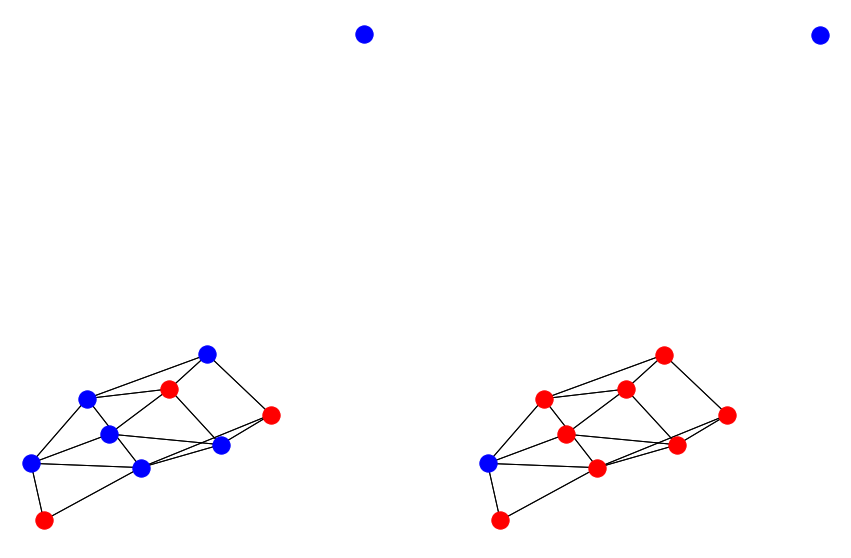

In [13]:
# Run 
resultActive = InfluenceProp(A, initActive, theta, itersNum = 3)

# Look 
ShowIteration(G, initActive, resultActive, pos)

## Clusters 

Lets call a cluster with density $p$ a set of nodes s.t. each node has at least $p$ fraction of its neighbours in the set. And it turn out that then only thing that can stop cascades are clusters, particularly:


*Consider a network with a threshold of $\theta$ a set of initialy activated nodes*
1. *If the remaining network contains a cluster of density greater than $1 − \theta$, then the set of initial adopters **will not** cause a complete cascade.*
2. *Whenever a set of initial adopters does not cause a complete cascade with threshold $\theta$, the remaining network must contain a cluster of density greater than $1 − \theta$.*


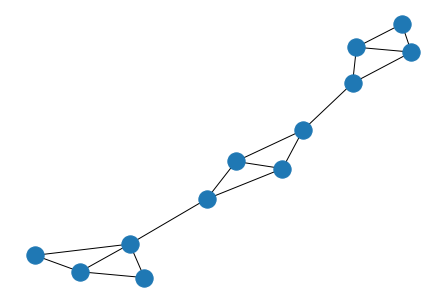

In [14]:
# Illustrative Example

G = nx.cycle_graph(4)
arrG = [G]*3
G = ft.reduce(lambda g1,g2: nx.disjoint_union(g1,g2), arrG)
edList = [(0,2),(4,6),(9,11)] 
G.add_edges_from(edList)
edList = [(3,5),(4,7),(7,11)]
G.add_edges_from(edList)
nx.draw_spring(G)

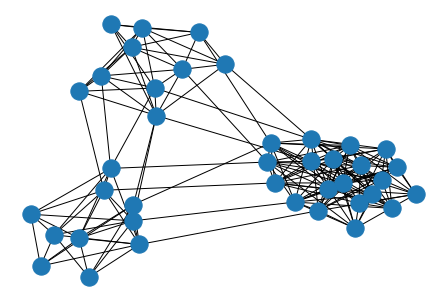

In [15]:
# Randomized Option. (may not end well..)

arrG = [nx.erdos_renyi_graph(10, 0.6)]* 2
arrG.append(nx.erdos_renyi_graph(20, 0.6))
G = ft.reduce(lambda g1,g2: nx.disjoint_union(g1,g2), arrG)
# nx.draw(G)
edList = zip(np.random.randint(0,10,size=(5,)), np.random.randint(10,20,size=(5,)))
G.add_edges_from(edList)
edList = zip(np.random.randint(0,10,size=(5,)), np.random.randint(20,40,size=(5,)))
G.add_edges_from(edList)
edList = zip(np.random.randint(10,20,size=(5,)), np.random.randint(20,40,size=(5,)))
G.add_edges_from(edList)
pos = nx.spring_layout(G)
nx.draw(G, pos=pos)

In [16]:
A = np.array(nx.adjacency_matrix(G).todense())
n = A.shape[0]

theta = 1.0/10

idx = range(0, 5)
initActive = np.zeros((n,), dtype=bool)
initActive[idx] = 1

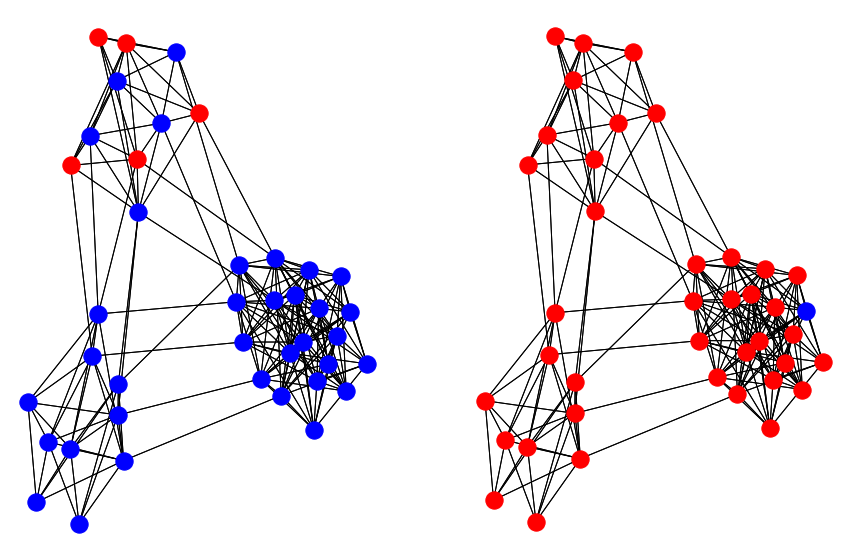

In [21]:
# Run
resultActive = InfluenceProp(A, initActive, theta, 5)

# Look
ShowIteration(G, initActive, resultActive, pos)